In [1]:
import pandas as pd
import cellcharter as cc
import scanpy as sc
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


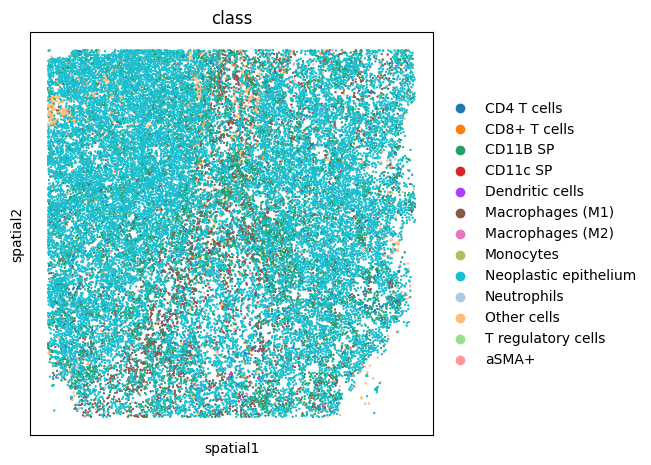

In [2]:
adata = sc.read('anndata/KN00012ROI01.h5ad')
sq.pl.spatial_scatter(adata, shape=None,size=1, color="class")
#plt.savefig("KN00012ROI01_celltype.png", dpi=300, bbox_inches='tight')

/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


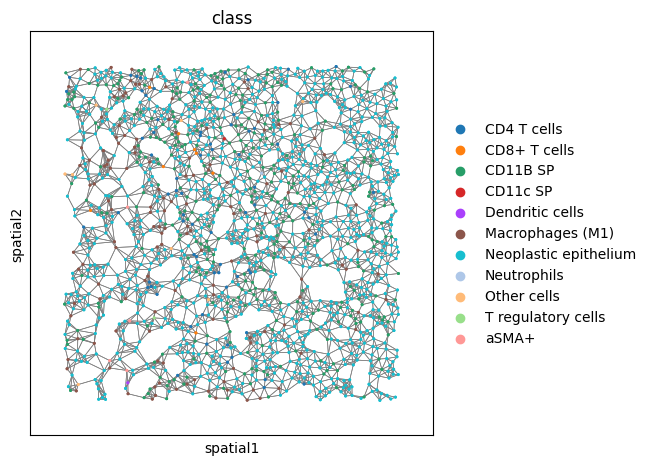

In [3]:
sq.gr.spatial_neighbors(adata)
sq.pl.spatial_scatter(
    adata, 
    color='class', 
    crop_coord=(2000, 2000, 3000, 3000 ),
    shape=None,
    size=5,
    connectivity_key='spatial_connectivities',
    edges_width= 0.5
    )
plt.savefig("KN00012ROI01_celltype_zoomin.png", dpi=300, bbox_inches='tight')

In [4]:
print(adata)

AnnData object with n_obs × n_vars = 26392 × 10
    obs: 'class'
    uns: 'class_colors', 'spatial_neighbors'
    obsm: 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'


In [4]:
#for next function, the use_rep default is adata.X, but we want to use annotated celltypes. for the algothrim the use_rep has to be numerical and embedded in obsm. so here is that conversion. 
import pandas as pd
one_hot = pd.get_dummies(adata.obs['class'])
adata.obsm['class_onehot'] = one_hot.values

In [6]:
print(adata)

AnnData object with n_obs × n_vars = 26392 × 10
    obs: 'class'
    uns: 'class_colors', 'spatial_neighbors'
    obsm: 'spatial', 'class_onehot'
    obsp: 'spatial_connectivities', 'spatial_distances'


In [7]:
#check class_onehot
class_onehot = adata.obsm['class_onehot']
print(class_onehot[:5])  # Adjust the number of rows as needed
print(type(class_onehot))
print(class_onehot.shape)

[[False False False False False False False False False False False False
   True]
 [False False False False False False False False False False False False
   True]
 [False False False False False False False False False False False False
   True]
 [False False False False False False False False False False False False
   True]
 [False False False False False False False False False False False False
   True]]
<class 'numpy.ndarray'>
(26392, 13)


In [7]:
#three layers of neighbors (neigbot hops), features are class_onehot
cc.gr.aggregate_neighbors(adata, n_layers=3, use_rep='class_onehot')

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 73.73it/s]


In [9]:
print(adata)

AnnData object with n_obs × n_vars = 26392 × 10
    obs: 'class'
    uns: 'class_colors', 'spatial_neighbors'
    obsm: 'spatial', 'class_onehot', 'X_cellcharter'
    obsp: 'spatial_connectivities', 'spatial_distances'


In [5]:
#create the Gaussian Mixture model, n=11 a good setting for this example on tutorial.. but for me, n=3? there is a way to obstain the optimal number of clusters
gmm = cc.tl.Cluster(
    n_clusters=3, 
    random_state=12345,
)

In [11]:
print(adata)

AnnData object with n_obs × n_vars = 26392 × 10
    obs: 'class'
    uns: 'class_colors', 'spatial_neighbors'
    obsm: 'spatial', 'class_onehot', 'X_cellcharter'
    obsp: 'spatial_connectivities', 'spatial_distances'


In [13]:
#make a gaussian clustering 
gmm.fit(adata, use_rep='X_cellcharter')

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=5` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=1` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 3: 100%|█████████████████████████| 1/1 [00:00<00:00, 48.75it/s, nll=-171.]


In [14]:
print(adata)

AnnData object with n_obs × n_vars = 26392 × 10
    obs: 'class'
    uns: 'class_colors', 'spatial_neighbors', '_cellcharter'
    obsm: 'spatial', 'class_onehot', 'X_cellcharter'
    obsp: 'spatial_connectivities', 'spatial_distances'


In [15]:
#spatial clustering
adata.obs['spatial_cluster'] = gmm.predict(adata, use_rep='X_cellcharter')

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|████████████████████| 1/1 [00:00<00:00, 78.02it/s]


In [10]:
print(adata)

AnnData object with n_obs × n_vars = 26392 × 10
    obs: 'class'
    uns: 'class_colors', 'spatial_neighbors', '_cellcharter'
    obsm: 'spatial', 'class_onehot', 'X_cellcharter'
    obsp: 'spatial_connectivities', 'spatial_distances'


In [16]:
print(adata.obs['spatial_cluster'])

0        2
1        2
2        2
3        2
4        2
        ..
26387    1
26388    1
26389    1
26390    1
26391    1
Name: spatial_cluster, Length: 26392, dtype: category
Categories (3, int64): [0, 1, 2]


/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


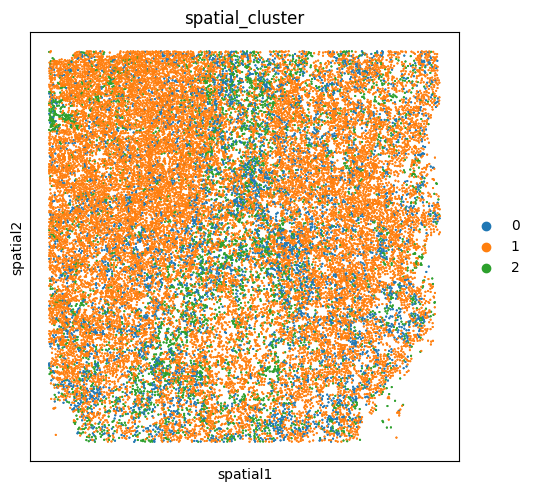

In [17]:
sq.pl.spatial_scatter(adata, shape=None, size=1, color="spatial_cluster")

/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


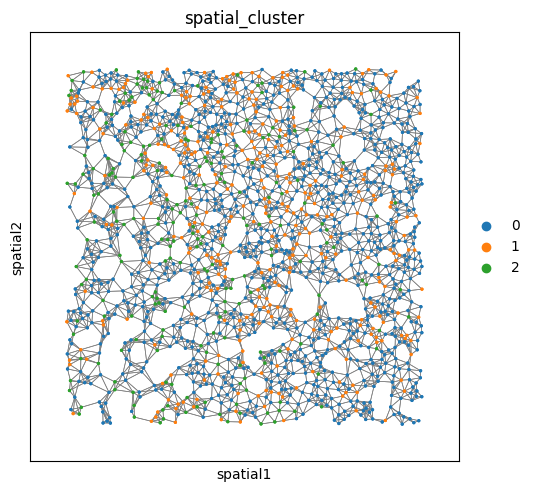

In [20]:
#zoom in above 
sq.pl.spatial_scatter(
    adata, 
    color='spatial_cluster', 
    crop_coord=(2000, 2000, 3000, 3000 ),
    shape=None,
    size=7,
    connectivity_key='spatial_connectivities',
    edges_width= 0.5
    )

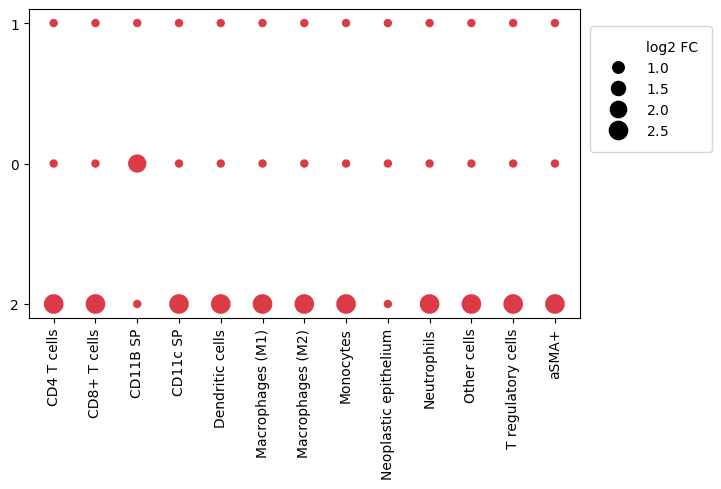

In [18]:
cc.gr.enrichment(adata, group_key='spatial_cluster', label_key='class')
cc.pl.enrichment(adata, group_key='spatial_cluster', label_key='class', figsize=(6,5), fontsize=10, dot_scale=2)

/var/folders/y0/xtkgj_xx1n3fylstssq873p1r3q_9y/T/ipykernel_58005/2640887682.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_data = extracted_data.groupby(["spatial_cluster", "class"]).size().unstack(fill_value=0)


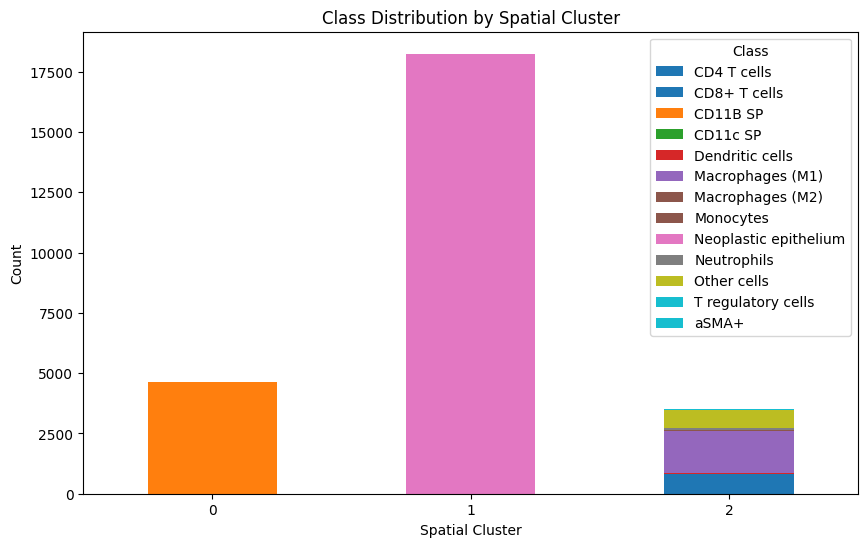

In [20]:
extracted_data = adata.obs[['class', 'spatial_cluster']]
agg_data = extracted_data.groupby(["spatial_cluster", "class"]).size().unstack(fill_value=0)
agg_data.plot(kind="bar", stacked=True, colormap="tab10", figsize=(10,6))
plt.title("Class Distribution by Spatial Cluster")
plt.xlabel("Spatial Cluster")
plt.ylabel("Count")
plt.xticks(rotation=0, ha="center")
plt.legend(title="Class")
plt.show()